In [1]:
!nvidia-smi

Tue Apr 15 10:26:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   67C    P0             34W /   72W |       1MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [3]:
try:
    import cupy as cp
    cupy_available = True
except ImportError:
    print("CuPy not available. Only NumPy matrices will be generated.")
    cupy_available = False

/opt/conda/envs/komputasi-modern/lib/python3.13/site-packages/cupy/_environment.py:541: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda12x

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [4]:
print(f'Apakah GPU terdeteksi? {cp.cuda.runtime.getDeviceCount() > 0}')
print(f'Apakah CUDA terdeteksi? {cp.cuda.is_available()}')

Apakah GPU terdeteksi? True
Apakah CUDA terdeteksi? True


In [5]:
dimensi = [8,16,32,64,128,256,512,1024, 2048, 4096, 8192, 16384, 32768]
dimensi_gpu = [8,16,32,64,128,256,512,1024, 2048, 4096, 8192, 16384, 32768]

In [6]:
# buat folder untuk menyimpan hasil
os.makedirs("matrix_results", exist_ok=True)

In [7]:
# Lists to store execution times
numpy_times = []
cupy_times = []
all_dimensions = sorted(list(set(dimensi + dimensi_gpu)))  # For plotting

In [8]:
def generate_numpy_matrix(dim):
    start_time = time.time()
    # Generate random integers between 1 and 100
    matrix = np.random.rand(dim, dim)
    end_time = time.time()
    execution_time = end_time - start_time
    numpy_times.append(execution_time)
    print(f"NumPy {dim}x{dim} matrix generated in {execution_time:.6f} seconds")
    return matrix, execution_time


In [9]:
def generate_cupy_matrix(dim):
    if not cupy_available:
        return None, 0
    
    start_time = time.time()
    # Generate random integers between 1 and 100
    matrix = cp.random.rand(dim, dim)
    # Force synchronization to get accurate timing
    cp.cuda.Stream.null.synchronize()
    end_time = time.time()
    execution_time = end_time - start_time
    cupy_times.append(execution_time)
    print(f"CuPy {dim}x{dim} matrix generated in {execution_time:.6f} seconds")
    return matrix, execution_time

In [10]:
print("\nGenerating NumPy matrices...")
for dim in dimensi:
    print(f"\nGenerating {dim}x{dim} NumPy matrix...")
    
    # Generate NumPy matrix
    np_matrix, np_time = generate_numpy_matrix(dim)
    
    # Save a sample of the NumPy matrix (first 10x10 elements) to a text file
    with open(f"matrix_results/numpy_matrix_{dim}x{dim}_sample.txt", "w") as f:
        f.write(f"NumPy Random Matrix {dim}x{dim} (showing first 10x10 elements):\n")
        sample_size = min(10, dim)
        for i in range(sample_size):
            f.write(" ".join(map(str, np_matrix[i, :sample_size])) + "\n")


Generating NumPy matrices...

Generating 8x8 NumPy matrix...
NumPy 8x8 matrix generated in 0.000074 seconds

Generating 16x16 NumPy matrix...
NumPy 16x16 matrix generated in 0.000030 seconds

Generating 32x32 NumPy matrix...
NumPy 32x32 matrix generated in 0.000032 seconds

Generating 64x64 NumPy matrix...
NumPy 64x64 matrix generated in 0.000089 seconds

Generating 128x128 NumPy matrix...
NumPy 128x128 matrix generated in 0.000226 seconds

Generating 256x256 NumPy matrix...
NumPy 256x256 matrix generated in 0.000821 seconds

Generating 512x512 NumPy matrix...
NumPy 512x512 matrix generated in 0.003071 seconds

Generating 1024x1024 NumPy matrix...
NumPy 1024x1024 matrix generated in 0.010859 seconds

Generating 2048x2048 NumPy matrix...
NumPy 2048x2048 matrix generated in 0.042148 seconds

Generating 4096x4096 NumPy matrix...
NumPy 4096x4096 matrix generated in 0.162059 seconds

Generating 8192x8192 NumPy matrix...
NumPy 8192x8192 matrix generated in 0.645639 seconds

Generating 16384

In [11]:
print("\nGenerating CuPy matrices...")
if cupy_available:
    for dim in dimensi_gpu:
        print(f"\nGenerating {dim}x{dim} CuPy matrix...")
        
        # Generate CuPy matrix
        cp_matrix, cp_time = generate_cupy_matrix(dim)
        
        # Save a sample of the CuPy matrix (first 10x10 elements) to a text file
        with open(f"matrix_results/cupy_matrix_{dim}x{dim}_sample.txt", "w") as f:
            f.write(f"CuPy Random Matrix {dim}x{dim} (showing first 10x10 elements):\n")
            sample_size = min(10, dim)
            cp_matrix_np = cp.asnumpy(cp_matrix)  # Convert to NumPy array
            for i in range(sample_size):
                f.write(" ".join(map(str, cp_matrix_np[i, :sample_size])) + "\n")


Generating CuPy matrices...

Generating 8x8 CuPy matrix...
CuPy 8x8 matrix generated in 0.460364 seconds

Generating 16x16 CuPy matrix...
CuPy 16x16 matrix generated in 0.000226 seconds

Generating 32x32 CuPy matrix...
CuPy 32x32 matrix generated in 0.000136 seconds

Generating 64x64 CuPy matrix...
CuPy 64x64 matrix generated in 0.000132 seconds

Generating 128x128 CuPy matrix...
CuPy 128x128 matrix generated in 0.000124 seconds

Generating 256x256 CuPy matrix...
CuPy 256x256 matrix generated in 0.000119 seconds

Generating 512x512 CuPy matrix...
CuPy 512x512 matrix generated in 0.000315 seconds

Generating 1024x1024 CuPy matrix...
CuPy 1024x1024 matrix generated in 0.000259 seconds

Generating 2048x2048 CuPy matrix...
CuPy 2048x2048 matrix generated in 0.000366 seconds

Generating 4096x4096 CuPy matrix...
CuPy 4096x4096 matrix generated in 0.002002 seconds

Generating 8192x8192 CuPy matrix...
CuPy 8192x8192 matrix generated in 0.007237 seconds

Generating 16384x16384 CuPy matrix...
C

: 

In [21]:
numpy_times_dict = {dim: time for dim, time in zip(dimensi, numpy_times)}
cupy_times_dict = {dim: time for dim, time in zip(dimensi_gpu, cupy_times)}


Performance comparison plot saved to 'matrix_results/performance_comparison.png'


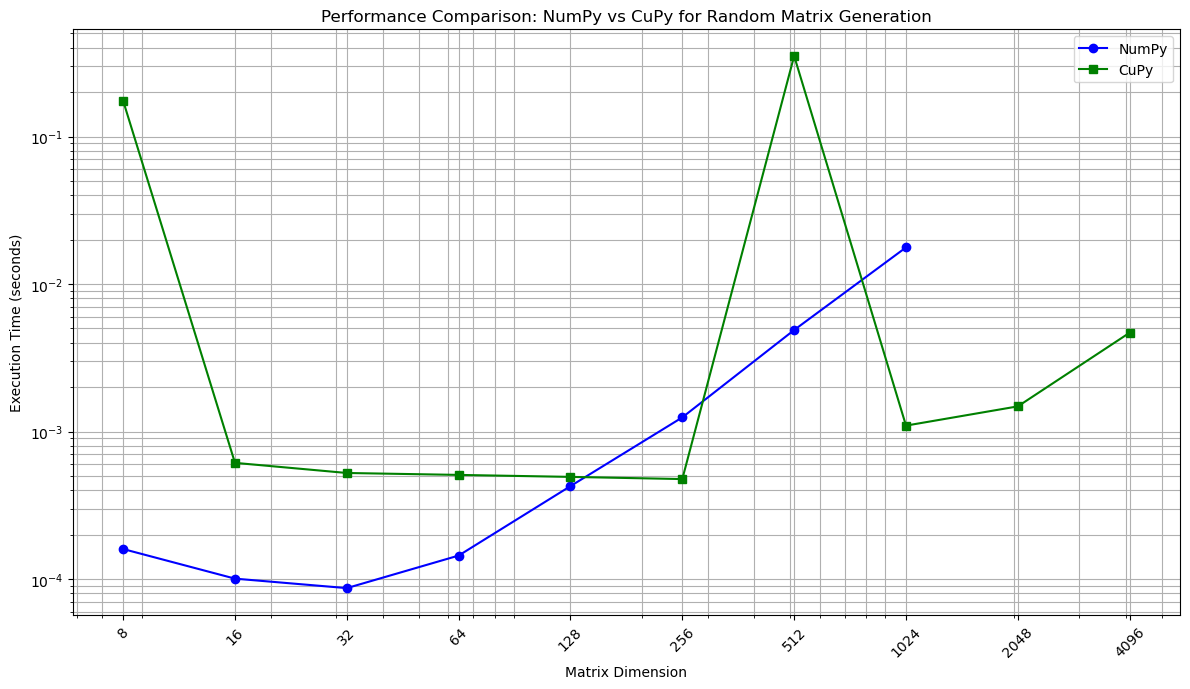

In [22]:
if cupy_available:
    plt.figure(figsize=(12, 7))
    
    # Plot NumPy times
    np_dims = dimensi
    np_times = [numpy_times_dict[d] for d in np_dims]
    plt.plot(np_dims, np_times, 'o-', label='NumPy', color='blue')
    
    # Plot CuPy times
    cp_dims = dimensi_gpu
    cp_times = [cupy_times_dict[d] for d in cp_dims]
    plt.plot(cp_dims, cp_times, 's-', label='CuPy', color='green')
    
    plt.xlabel('Matrix Dimension')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Performance Comparison: NumPy vs CuPy for Random Matrix Generation')
    plt.legend()
    
    # Use 'log' scale instead of 'log2'
    plt.xscale('log')  # Changed from 'log2' to 'log'
    plt.yscale('log')
    
    # Add grid for better readability
    plt.grid(True, which="both", ls="-")
    
    # Add custom x-ticks for dimensions
    plt.xticks(all_dimensions, [str(d) for d in all_dimensions], rotation=45)
    
    plt.tight_layout()
    plt.savefig('matrix_results/performance_comparison.png')
    print("\nPerformance comparison plot saved to 'matrix_results/performance_comparison.png'")

In [ ]:
print("\nSummary:")
print("=" * 70)
print(f"{'Dimension':<10} {'NumPy Time (s)':<15} {'CuPy Time (s)':<15} {'Speedup':<10}")
print("-" * 70)

for dim in all_dimensions:
    np_time = numpy_times_dict.get(dim, float('nan'))
    cp_time = cupy_times_dict.get(dim, float('nan'))
    
    np_str = f"{np_time:<15.6f}" if dim in numpy_times_dict else "N/A"
    cp_str = f"{cp_time:<15.6f}" if dim in cupy_times_dict else "N/A"
    
    if dim in numpy_times_dict and dim in cupy_times_dict and cp_time > 0:
        speedup = np_time / cp_time
        speedup_str = f"{speedup:<10.2f}x"
    else:
        speedup_str = "N/A"
    
    print(f"{dim:<10} {np_str} {cp_str} {speedup_str}")